UFRGS - Univesidade Federal do Rio Grande do Sul  
PPGEC - Programa de Pós-Graduação em Engenharia Civil  
PEC00025 - Introdução à Teoria de Vibrações


## Trabalho 01: Análise da Resposta de um Sistema de um Grau de Libertade Excitado pela Base  
  
  
NOME: José Lucas Silva Borges  
CÓDIGO: 00312313

### SUMÁRIO
[1 - INTRODUÇÃO](#section_1)  
[2 - CARREGAR OS MÓDULOS](#section_2)   
[3 - DEFINIÇÃO DOS PARÂMETROS INICIAIS](#section_3)   
[4 - PERIODOGRAMA DO SINAL LIDO (Input)](#section_4)   
[5 - ESPECTRO DE PSEUDO-ACELERAÇÃO](#section_5)   
[6 - PERIODOGRAMA DA SAÍDA (Output)](#section_6)   
[7 - CONSIDERAÇÕES FINAIS](#section_7)   


### 1 - INTRODUÇÃO   <a name="section_1"></a> 

O presente trabalho buscou analisar a resposta de um sistema de um grau de liberdade quando excitado por uma aceleração em sua base. Na metodologia adotada, empregou-se o aplicativo de celular iNVH (BOSCH) para medir as variações de aceleração no decorrer do tempo. Adotou-se um sistema constituído por uma régua em balanço onde o ponto de medição encontrava-se na extremidade livre. A adoção desse sistema deve-se à busca por um sinal de menor frequência, visto que o celular apresenta limitações na taxa de aquisição de dados.
Após a leitura do arquivo, aplicou-se a extração dos valores de aceleração no eixo Z. Como pode ser visto nos tópicos abaixo, estes dados foram utilizados na construção do espectro de pseudo-aceleração e periodogramas de entrada e de saída.

### 2 - CARREGAR OS MÓDULOS <a name="section_2"></a>
Carregar os móludos utilizados na programação. O módulo MRPy foi desenvolvido pelo prof. Marcelo M. Rocha.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MRPy import MRPy

### 2 - DEFINIÇÃO DOS PARÂMETROS INICIAIS <a name="section_3"></a>

Os parâmetros do sistema fictício foram definidos abaixo:

In [46]:
m  = 1.0       # Massa do sistema (kg)
fn = 0.1       # Frequência inicial (Hz)
zt = 0.01      # Razão de amortecimento
u0 = 0.        # Deslocamento inicial
v0 = 0.        # Velocidade inicial

### 3 - LEITURA DO ARQUIVO <a name="section_3"></a>

Leitura e extraçãos dos dados referentes ao eixo Z. Ao Final, plota-se o gráfico aceleração x tempo.

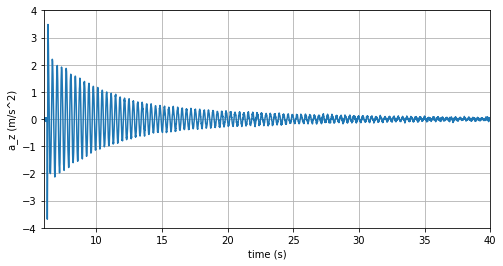

In [47]:
data = MRPy.from_file('data/regua', form='invh').zero_mean()
t    = data.t_axis()
    
# Extração dos dados da componente de aceleração no eixo Z

az = MRPy(data[2], data.fs)  
t  = az.t_axis()
plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(6, 40);  plt.xlabel('time (s)') 
plt.ylim(-4, 4);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

### 4 - PERIODOGRAMA DO SINAL LIDO (Input) <a name="section_4"></a>
O primeiro tratamento dos dados lidos acontece por meio do gráfico do periodograma dos valores de entrada (Input). Nele pode-se apontar a frequência que proporciona maior energia ao sistema. Ao final, apresenta-se o gráfico e valor da frequência onde o pico ocorre.  
A construção do periodograma utilizou a função 'periodogram' presente no módulo MRPy.

O valor de pico ocorre na frequência 2.958375746758738 Hz


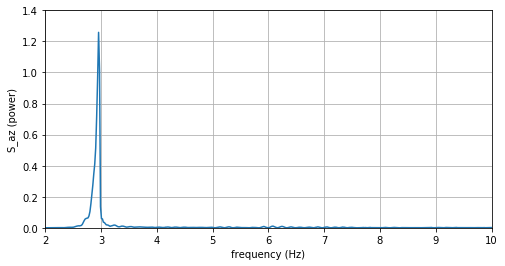

In [48]:
# Leitura do sinal de entrada
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(2, 10);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  1.4);   plt.ylabel('S_az (power)') 

# Frequência onde ocorre o pico
fp = f[np.argmax(Saz[0])]
print("O valor de pico ocorre na frequência", fp, "Hz")

plt.grid(True)


### 5 - ESPECTRO DE PSEUDO-ACELERAÇÃO <a name="section_5"></a>

Para plotagem do espectro de pseudo-aceleração utilizou-se os valores de pico das acelerações obtidos pela variação na frequência natural do sistema. Para tal, emprogou-se o Método de Duhamel para solução numérica do sistema excitado por uma força externa.  
Este método foi executado por meio da função 'sdof_Duhamel' presente no módulo MRPy.

Período e frequência onde se localiza o pico 0.3424657534246597 s   2.9199999999999817 Hz


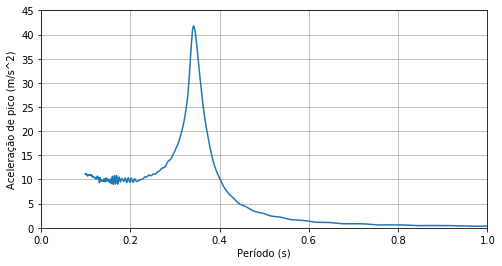

In [49]:
fn = 0.1       # Frequência inicial (Hz)
n = 1000        # Quantidade de pontos calculados

TN = np.zeros(n)
AP = np.zeros(n)

# Rotina p/ Cálculo dos Máximos Absolutos
for x in range(0,n):
    k = m*(2*np.pi*fn)**2
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m    
    compare=[u_DH.max(),np.abs(u_DH.min())]
    ymax=np.max(compare)
    wn = np.sqrt(k/m)
    AP[x] = (wn**2)*ymax
    TN[x] = 1/fn
    fn+=.01

# Período onde se localiza o pico
Tn_p =TN[np.argmax(AP)]  

print("Período e frequência onde se localiza o pico", Tn_p,"s  ",1/Tn_p,"Hz")

plt.figure(9, figsize=(8, 4), clear=True)
plt.plot(TN, AP)

plt.xlim(0,  1);        plt.xlabel('Período (s)') 
plt.ylim(0, 45);        plt.ylabel('Aceleração de pico (m/s^2)') 

plt.grid(True)

### 6 - PERIODOGRAMA DA SAÍDA (Output) <a name="section_6"></a>

Com base no resultado indicado pelo periodograma de entrada, aplicou-se a frequência de pico à função do Método de Duhamel.
 Em seguida, executou-se um novo periodograma com os dados extraídos do passo anterior.

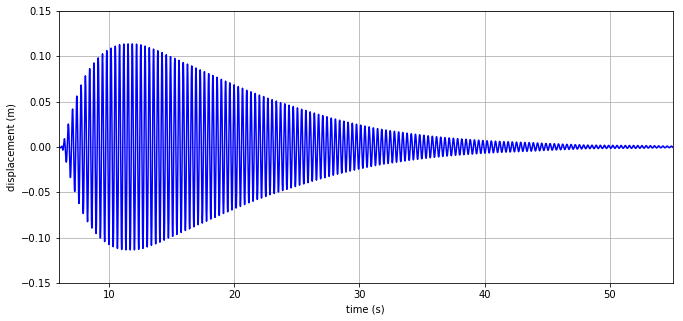

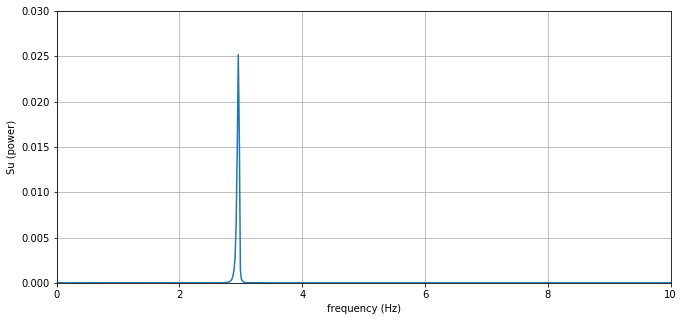

In [50]:
# Função de Duhamel em relação a fp

u_DH = az.sdof_Duhamel(fp, zt, u0, v0)/m

plt.figure(8, figsize=(11, 5), clear=True)
plt.plot(t, u_DH[0], 'b')

plt.xlim(6, 55);        plt.xlabel('time (s)') 
plt.ylim(-0.15, 0.15);   plt.ylabel('displacement (m)') 

plt.grid(True) 

# Periodograma de Saída em função de fp
Su, fs = u_DH.periodogram()
f       = u_DH.f_axis()

plt.figure(6, figsize=(11, 5), clear=True)
plt.plot(f, Su[0])

plt.xlim(0, 10);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.03);   plt.ylabel('Su (power)') 

plt.grid(True)

### 7 - CONSIDERAÇÕES FINAIS <a name="section_7"></a>

O sistema empregado para análise possuia um grau de liberdade. Os dados lidos por meio do aplicativo iVNH (BOSH) possibilitaram a construção do gráfico de aceleração no eixo Z em função do tempo. O periodograma do sinal de entrada mostrou que a frequência de maior energia do sistema encontrava-se em aproximadamente 2.96 Hz. Tal característica é evidenciada no espectro de pseudo-aceleração onde o pico estava em frequência semelhante, 2.92 Hz. Ao utilizar esse valor no método de Duhamel e aplicar novamente o periodograma, pôde-se constatar a energia atribuida a essa frequência. 